In [14]:
import pandas as pd
import numpy as np
import random
# Load the dataset
data = pd.read_csv('DSet.csv')
data_norm=pd.read_csv('Dset.csv') 

# Feature Engineering Task 1

In [15]:
def Engineering_Task1(data):
    # Iterate through each column
    for col in data.columns:
        # Check if the column contains missing values
        if data[col].isnull().sum() > 0:
            # If the column is categorical, impute with the most frequent value
            if data[col].dtype == 'object':
                data[col].fillna(data[col].value_counts().index[0], inplace=True)

        # If the column is numerical, impute with the mean value
            else:
                data[col].fillna(data[col].mean(), inplace=True)

# Save the imputed dataset
    data.to_csv('imputed_data.csv', index=False)


# Feature Engineering Task 2

In [16]:
def Engineering_Task2(data):
    # Iterate through each column
    for col in data.columns:
        # Calculate the mean and standard deviation of the column
        if data[col].dtype != 'object' and col!='id':
            mean = data[col].mean()
            std = data[col].std()
            # Normalize the column using the formula (X' = (X - µ) / σ)
            data[col] = (data[col] - mean) / std  


    # Save the normalized dataset
    data.to_csv('normalized_data.csv', index=False)
    # print(data)

## Logistic Regression

In [17]:


import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(z):
    """
    Computes the sigmoid function for the input z.
    """
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    """
    Logistic Regression model.
    """
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y, gd_type="batch", batch_size=32):
        """
        Fits the model to the training data using the specified GD algorithm.
        """
        # Initialize parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        
        costs = []

        # Gradient descent
        dw=np.zeros(n_features)
        for i in range(self.num_iterations):
            if gd_type == "batch":
                # Batch gradient descent
                
                y_pred=np.zeros(n_samples)
                z_arr=np.zeros(n_samples)
                for j in range(n_samples):
                    z = np.dot(X[j], self.weights) + self.bias
    #                 print(z)
                    z_arr[j]=z    
                    y_pred[j]=(sigmoid(z))
            
                for j in range(n_samples):
                    dw+=(y_pred[j]-y[j])*X[j]
                
#                 plt.scatter(z_arr,y_pred)
#                 plt.show()
                    
                dw=(1/n_samples)*dw
                db = (1 / n_samples) * np.sum(y_pred - y)
                
                y_pred = np.clip(y_pred, 1e-15, 1-(1e-15))                
                cost=0
                for j in range(n_samples):
                    cost+=(y[j]*np.log(y_pred[j])+(1-y[j])*np.log(1-y_pred[j]))
                cost=cost/n_samples
                costs.append(-cost)
#                 costs.append(-np.mean(y*np.log(y_pred) + (1-y)*np.log((1-y_pred))))

#                 print(y_pred)
                
                
                
            elif gd_type == "mini-batch":
                # Mini-batch gradient descent
                batch_indices = np.random.choice(n_samples, batch_size, replace=False)
#                 print(batch_indices)
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                y_pred=np.zeros(batch_size)
                z_arr=np.zeros(batch_size)
                for j in range(batch_size):
                    z = np.dot(X_batch[j], self.weights) + self.bias
                    z_arr[j]=z
                    y_pred[j]=(sigmoid(z))
                
                y_pred = np.clip(y_pred, 1e-15, 1-(1e-15))
                for j in range(batch_size):
                    dw+=(y_pred[j]-y[j])*X[j]
                
                dw=(1/batch_size)*dw
                db = (1 / batch_size) * np.sum(y_pred - y_batch)
                
#                 y_pred = np.clip(y_pred, 1e-15, 1-(1e-15))                
                cost=0
                for j in range(batch_size):
                    cost+=(y_batch[j]*np.log(y_pred[j])+(1-y_batch[j])*np.log(1-y_pred[j]))
                cost=cost/batch_size
                costs.append(-cost)
          
            else:
                # Stochastic gradient descent
#                 print('this is stochastic')
                j = np.random.randint(n_samples)
                
                z = np.dot(X[j], self.weights) + self.bias
                y_pred=(sigmoid(z))
                y_pred = np.clip(y_pred, 1e-15, 1-(1e-15))
#                 print("y_pred:",y_pred,"y[j]:",y[j])
                dw+=(y_pred-y[j])*X[j]
                db = np.sum(y_pred - y[j])
                
                
                cost=0
                cost+=(y[j]*np.log(y_pred)+(1-y[j])*np.log(1-y_pred))
                costs.append(-cost)
                
        
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
#         print(costs,self.num_iterations)
        return np.array(range(self.num_iterations)),costs
#         plt.scatter(np.array(range(self.num_iterations)),costs)
#         plt.xlabel("Iteration Number")
#         plt.ylabel("Cost")
#         plt.plot()
    
    def predict(self, X, threshold=0.5):
        """
        Predicts the class labels for the input data.
        """
        y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred[y_pred >= threshold] = 1
        y_pred[y_pred < threshold] = 0
        return y_pred.astype(int)
    
    def get_precision(self, X, y):
        preds = self.predict(X)
        return np.sum(preds == y) / (np.sum(preds == y) + np.sum(np.logical_and(np.logical_not(y), preds)))
    
    def get_recall(self, X, y):
        preds = self.predict(X)
        return np.sum(preds == y) / (np.sum(preds == y) + np.sum(np.logical_and(y, np.logical_not(preds))))


# Learning Task1 Batch LR=0.01

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.92
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.91
Threshold0.4
Testing precision with threshold 0.4: 0.92
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.91
Threshold0.5
Testing precision with threshold 0.5: 0.92
Testing recall with threshold 0.5: 0.98
Testing accuracy with threshold 0.5: 0.91
Threshold0.6
Testing precision with threshold 0.6: 0.92
Testing recall with threshold 0.6: 0.98
Testing accuracy with threshold 0.6: 0.91
Threshold0.7
Testing precision with threshold 0.7: 0.92
Testing recall with threshold 0.7: 0.98
Testing accuracy with threshold 0.7: 0.91
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.92
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.91
Threshold0.4
Testing precision with threshold 0.4: 0

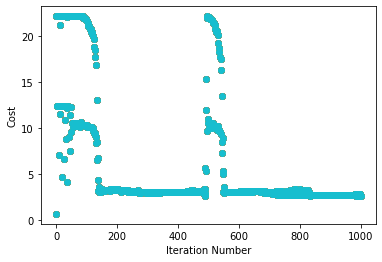

In [18]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.01) #learning rate is 0.01
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task1 Batch LR=0.001

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.94
Testing recall with threshold 0.3: 0.97
Testing accuracy with threshold 0.3: 0.91
Threshold0.4
Testing precision with threshold 0.4: 0.94
Testing recall with threshold 0.4: 0.97
Testing accuracy with threshold 0.4: 0.91
Threshold0.5
Testing precision with threshold 0.5: 0.94
Testing recall with threshold 0.5: 0.97
Testing accuracy with threshold 0.5: 0.91
Threshold0.6
Testing precision with threshold 0.6: 0.94
Testing recall with threshold 0.6: 0.97
Testing accuracy with threshold 0.6: 0.91
Threshold0.7
Testing precision with threshold 0.7: 0.94
Testing recall with threshold 0.7: 0.97
Testing accuracy with threshold 0.7: 0.91
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.94
Testing recall with threshold 0.3: 0.97
Testing accuracy with threshold 0.3: 0.91
Threshold0.4
Testing precision with threshold 0.4: 0

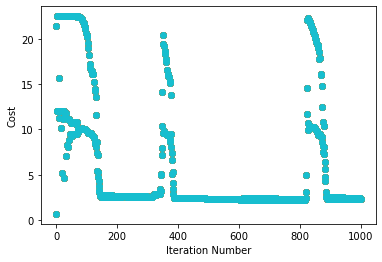

In [19]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.001) #learning rate is 0.01
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task1 Batch LR=0.0001

Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.95
Testing recall with threshold 0.3: 0.94
Testing accuracy with threshold 0.3: 0.90
Threshold0.4
Testing precision with threshold 0.4: 0.95
Testing recall with threshold 0.4: 0.94
Testing accuracy with threshold 0.4: 0.90
Threshold0.5
Testing precision with threshold 0.5: 0.95
Testing recall with threshold 0.5: 0.94
Testing accuracy with threshold 0.5: 0.90
Threshold0.6
Testing precision with threshold 0.6: 0.95
Testing recall with threshold 0.6: 0.94
Testing accuracy with threshold 0.6: 0.90
Threshold0.7
Testing precision with threshold 0.7: 0.95
Testing recall with threshold 0.7: 0.94
Testing accuracy with threshold 0.7: 0.89
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.95
Testing recall with threshold 0.3: 0.94
Testing accuracy with threshold 0.3: 0.90
Threshold0.4
Testing precision with threshold 0.4: 0

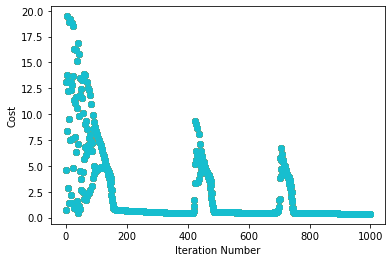

In [20]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.0001) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Mini-batch 0.01

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.97
Testing recall with threshold 0.3: 0.79
Testing accuracy with threshold 0.3: 0.77
Threshold0.4
Testing precision with threshold 0.4: 0.97
Testing recall with threshold 0.4: 0.79
Testing accuracy with threshold 0.4: 0.77
Threshold0.5
Testing precision with threshold 0.5: 0.97
Testing recall with threshold 0.5: 0.79
Testing accuracy with threshold 0.5: 0.77
Threshold0.6
Testing precision with threshold 0.6: 0.97
Testing recall with threshold 0.6: 0.79
Testing accuracy with threshold 0.6: 0.77
Threshold0.7
Testing precision with threshold 0.7: 0.97
Testing recall with threshold 0.7: 0.79
Testing accuracy with threshold 0.7: 0.77
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.97
Testing recall with threshold 0.3: 0.76
Testing accuracy with threshold 0.3: 0.74
Threshold0.4
Testing precision with threshold 0.4: 0

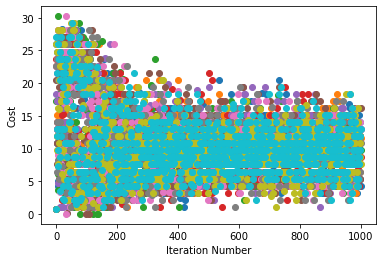

In [21]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.01) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"mini-batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Mini-batch 0.001

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.98
Testing recall with threshold 0.3: 0.82
Testing accuracy with threshold 0.3: 0.81
Threshold0.4
Testing precision with threshold 0.4: 0.98
Testing recall with threshold 0.4: 0.82
Testing accuracy with threshold 0.4: 0.81
Threshold0.5
Testing precision with threshold 0.5: 0.98
Testing recall with threshold 0.5: 0.82
Testing accuracy with threshold 0.5: 0.81
Threshold0.6
Testing precision with threshold 0.6: 0.98
Testing recall with threshold 0.6: 0.82
Testing accuracy with threshold 0.6: 0.81
Threshold0.7
Testing precision with threshold 0.7: 0.98
Testing recall with threshold 0.7: 0.82
Testing accuracy with threshold 0.7: 0.81
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.99
Testing recall with threshold 0.3: 0.75
Testing accuracy with threshold 0.3: 0.74
Threshold0.4
Testing precision with threshold 0.4: 0

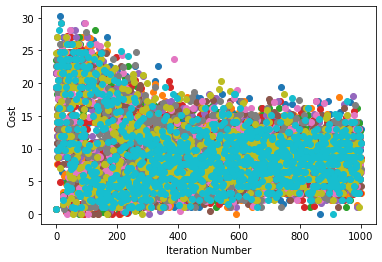

In [22]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.001) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"mini-batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Mini-batch 0.0001

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.67
Testing accuracy with threshold 0.3: 0.68
Threshold0.4
Testing precision with threshold 0.4: 1.00
Testing recall with threshold 0.4: 0.67
Testing accuracy with threshold 0.4: 0.68
Threshold0.5
Testing precision with threshold 0.5: 1.00
Testing recall with threshold 0.5: 0.67
Testing accuracy with threshold 0.5: 0.67
Threshold0.6
Testing precision with threshold 0.6: 1.00
Testing recall with threshold 0.6: 0.67
Testing accuracy with threshold 0.6: 0.67
Threshold0.7
Testing precision with threshold 0.7: 1.00
Testing recall with threshold 0.7: 0.67
Testing accuracy with threshold 0.7: 0.67
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.71
Testing accuracy with threshold 0.3: 0.71
Threshold0.4
Testing precision with threshold 0.4: 1

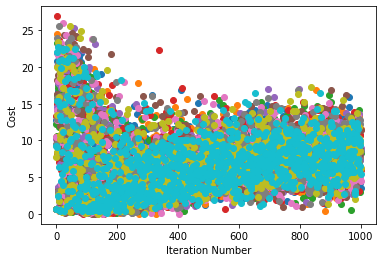

In [23]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.0001) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"mini-batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Stochastic 0.01

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 0.93
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.91
Threshold0.4
Testing precision with threshold 0.4: 0.93
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.91
Threshold0.5
Testing precision with threshold 0.5: 0.93
Testing recall with threshold 0.5: 0.98
Testing accuracy with threshold 0.5: 0.91
Threshold0.6
Testing precision with threshold 0.6: 0.93
Testing recall with threshold 0.6: 0.98
Testing accuracy with threshold 0.6: 0.91
Threshold0.7
Testing precision with threshold 0.7: 0.93
Testing recall with threshold 0.7: 0.98
Testing accuracy with threshold 0.7: 0.91
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.51
Testing accuracy with threshold 0.3: 0.51
Threshold0.4
Testing precision with threshold 0.4: 1

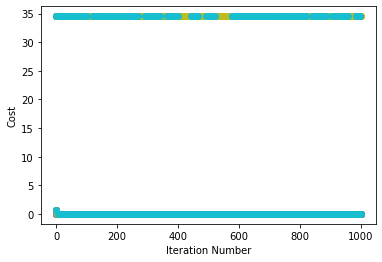

In [24]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.01) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"stochstic")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Stochastic 0.001

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.33
Testing accuracy with threshold 0.3: 0.33
Threshold0.4
Testing precision with threshold 0.4: 1.00
Testing recall with threshold 0.4: 0.33
Testing accuracy with threshold 0.4: 0.33
Threshold0.5
Testing precision with threshold 0.5: 1.00
Testing recall with threshold 0.5: 0.33
Testing accuracy with threshold 0.5: 0.33
Threshold0.6
Testing precision with threshold 0.6: 1.00
Testing recall with threshold 0.6: 0.33
Testing accuracy with threshold 0.6: 0.33
Threshold0.7
Testing precision with threshold 0.7: 1.00
Testing recall with threshold 0.7: 0.33
Testing accuracy with threshold 0.7: 0.33
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.36
Testing accuracy with threshold 0.3: 0.36
Threshold0.4
Testing precision with threshold 0.4: 1

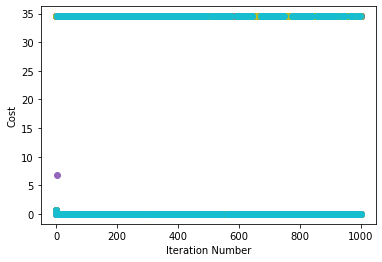

In [25]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.001) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"stochstic")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task 1 Stochastic 0.0001

C:\Users\nobel\AppData\Local\Temp\ipykernel_10260\2302046188.py:9: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.42
Testing accuracy with threshold 0.3: 0.42
Threshold0.4
Testing precision with threshold 0.4: 1.00
Testing recall with threshold 0.4: 0.42
Testing accuracy with threshold 0.4: 0.42
Threshold0.5
Testing precision with threshold 0.5: 1.00
Testing recall with threshold 0.5: 0.42
Testing accuracy with threshold 0.5: 0.42
Threshold0.6
Testing precision with threshold 0.6: 1.00
Testing recall with threshold 0.6: 0.42
Testing accuracy with threshold 0.6: 0.42
Threshold0.7
Testing precision with threshold 0.7: 1.00
Testing recall with threshold 0.7: 0.42
Testing accuracy with threshold 0.7: 0.42
Using Stochastic Gradient Descent with Learning rate:0.0001
Threshold0.3
Testing precision with threshold 0.3: 1.00
Testing recall with threshold 0.3: 0.51
Testing accuracy with threshold 0.3: 0.51
Threshold0.4
Testing precision with threshold 0.4: 1

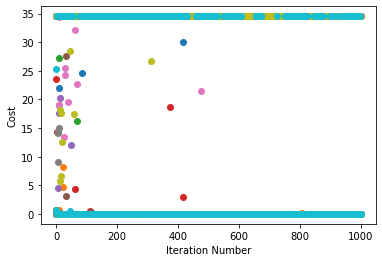

In [26]:
Engineering_Task1(data)
X = data.drop(['diagnosis','id'], axis=1).values
y = data['diagnosis'].values
y[y=='M']=0
y[y=='B']=1
# shuffle the indices of the data
indices = list(range(len(X)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X))


# split the data into training and testing sets
train_X = X[indices[:split_idx]]
train_y = y[indices[:split_idx]]
test_X = X[indices[split_idx:]]
test_y = y[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []

for i in range(10):
    model = LogisticRegression(0.0001) #learning rate is 0.0001
    # print(train_y)
    itrns,costs=model.fit(train_X, train_y,"stochstic")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()    
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        print(f"Threshold{threshold}")
        y_pred = model.predict(test_X, threshold=threshold)
        accuracy = np.mean(y_pred == test_y)
        recall=model.get_recall(test_X,test_y)
        precision=model.get_precision(test_X,test_y)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)        
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")
        
f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')

# Learning Task2 Batch LR 0.01

Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.99
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.94
Testing precision with threshold 0.4: 0.99
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.96
Testing precision with threshold 0.5: 0.99
Testing recall with threshold 0.5: 0.98
Testing accuracy with threshold 0.5: 0.97
Testing precision with threshold 0.6: 0.99
Testing recall with threshold 0.6: 0.98
Testing accuracy with threshold 0.6: 0.96
Testing precision with threshold 0.7: 0.99
Testing recall with threshold 0.7: 0.98
Testing accuracy with threshold 0.7: 0.96
Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.99
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.94
Testing precision with threshold 0.4: 0.99
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.96
Testi

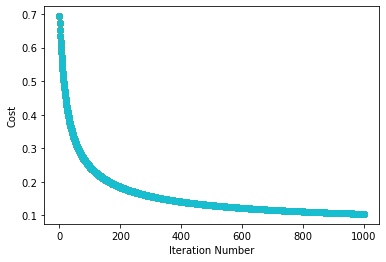

In [27]:
Engineering_Task1(data_norm)
Engineering_Task2(data_norm)
X_norm = data_norm.drop(['diagnosis','id'], axis=1).values
y_norm = data_norm['diagnosis'].values
y_norm[y_norm=='M']=0
y_norm[y_norm=='B']=1
# shuffle the indices of the data
indices = list(range(len(X_norm)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X_norm))


# split the data into training and testing sets
train_X_norm = X_norm[indices[:split_idx]]
train_y_norm = y_norm[indices[:split_idx]]
test_X_norm = X_norm[indices[split_idx:]]
test_y_norm = y_norm[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []


for i in range(10):
    model = LogisticRegression()
    # print(train_y_norm)
    itrns,costs=model.fit(train_X_norm, train_y_norm,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        y_pred_norm = model.predict(test_X_norm, threshold=threshold)
        accuracy = np.mean(y_pred_norm == test_y_norm)
        recall=model.get_recall(test_X_norm,test_y_norm)
        precision=model.get_precision(test_X_norm,test_y_norm)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")       

f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')




# Learning Task2 Batch LR 0.001

Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.98
Testing recall with threshold 0.3: 0.99
Testing accuracy with threshold 0.3: 0.88
Testing precision with threshold 0.4: 0.98
Testing recall with threshold 0.4: 0.99
Testing accuracy with threshold 0.4: 0.95
Testing precision with threshold 0.5: 0.98
Testing recall with threshold 0.5: 0.99
Testing accuracy with threshold 0.5: 0.97
Testing precision with threshold 0.6: 0.98
Testing recall with threshold 0.6: 0.99
Testing accuracy with threshold 0.6: 0.94
Testing precision with threshold 0.7: 0.98
Testing recall with threshold 0.7: 0.99
Testing accuracy with threshold 0.7: 0.89
Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.98
Testing recall with threshold 0.3: 0.99
Testing accuracy with threshold 0.3: 0.88
Testing precision with threshold 0.4: 0.98
Testing recall with threshold 0.4: 0.99
Testing accuracy with threshold 0.4: 0.95
Testi

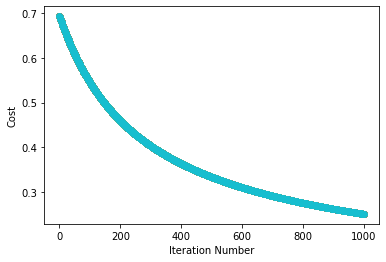

In [28]:
Engineering_Task1(data_norm)
Engineering_Task2(data_norm)
X_norm = data_norm.drop(['diagnosis','id'], axis=1).values
y_norm = data_norm['diagnosis'].values
y_norm[y_norm=='M']=0
y_norm[y_norm=='B']=1
# shuffle the indices of the data
indices = list(range(len(X_norm)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X_norm))


# split the data into training and testing sets
train_X_norm = X_norm[indices[:split_idx]]
train_y_norm = y_norm[indices[:split_idx]]
test_X_norm = X_norm[indices[split_idx:]]
test_y_norm = y_norm[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []


for i in range(10):
    model = LogisticRegression(0.001)
    # print(train_y_norm)
    itrns,costs=model.fit(train_X_norm, train_y_norm,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        y_pred_norm = model.predict(test_X_norm, threshold=threshold)
        accuracy = np.mean(y_pred_norm == test_y_norm)
        recall=model.get_recall(test_X_norm,test_y_norm)
        precision=model.get_precision(test_X_norm,test_y_norm)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")       

f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')




# Learning Task2 Batch LR 0.0001

Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.96
Testing recall with threshold 0.3: 0.94
Testing accuracy with threshold 0.3: 0.62
Testing precision with threshold 0.4: 0.96
Testing recall with threshold 0.4: 0.94
Testing accuracy with threshold 0.4: 0.78
Testing precision with threshold 0.5: 0.96
Testing recall with threshold 0.5: 0.94
Testing accuracy with threshold 0.5: 0.91
Testing precision with threshold 0.6: 0.96
Testing recall with threshold 0.6: 0.94
Testing accuracy with threshold 0.6: 0.59
Testing precision with threshold 0.7: 0.96
Testing recall with threshold 0.7: 0.94
Testing accuracy with threshold 0.7: 0.43
Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.96
Testing recall with threshold 0.3: 0.94
Testing accuracy with threshold 0.3: 0.62
Testing precision with threshold 0.4: 0.96
Testing recall with threshold 0.4: 0.94
Testing accuracy with threshold 0.4: 0.78
Testi

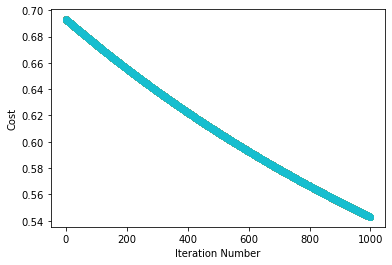

In [29]:
Engineering_Task1(data_norm)
Engineering_Task2(data_norm)
X_norm = data_norm.drop(['diagnosis','id'], axis=1).values
y_norm = data_norm['diagnosis'].values
y_norm[y_norm=='M']=0
y_norm[y_norm=='B']=1
# shuffle the indices of the data
indices = list(range(len(X_norm)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X_norm))


# split the data into training and testing sets
train_X_norm = X_norm[indices[:split_idx]]
train_y_norm = y_norm[indices[:split_idx]]
test_X_norm = X_norm[indices[split_idx:]]
test_y_norm = y_norm[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []


for i in range(10):
    model = LogisticRegression(0.0001)
    # print(train_y_norm)
    itrns,costs=model.fit(train_X_norm, train_y_norm,"batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        y_pred_norm = model.predict(test_X_norm, threshold=threshold)
        accuracy = np.mean(y_pred_norm == test_y_norm)
        recall=model.get_recall(test_X_norm,test_y_norm)
        precision=model.get_precision(test_X_norm,test_y_norm)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")       

f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')




# Learning Task2 Mini-Batch LR 0.001

Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.95
Testing recall with threshold 0.3: 0.96
Testing accuracy with threshold 0.3: 0.93
Testing precision with threshold 0.4: 0.95
Testing recall with threshold 0.4: 0.96
Testing accuracy with threshold 0.4: 0.93
Testing precision with threshold 0.5: 0.95
Testing recall with threshold 0.5: 0.96
Testing accuracy with threshold 0.5: 0.91
Testing precision with threshold 0.6: 0.95
Testing recall with threshold 0.6: 0.96
Testing accuracy with threshold 0.6: 0.90
Testing precision with threshold 0.7: 0.95
Testing recall with threshold 0.7: 0.96
Testing accuracy with threshold 0.7: 0.89
Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.95
Testing recall with threshold 0.3: 0.96
Testing accuracy with threshold 0.3: 0.93
Testing precision with threshold 0.4: 0.95
Testing recall with threshold 0.4: 0.96
Testing accuracy with threshold 0.4: 0.93
Testi

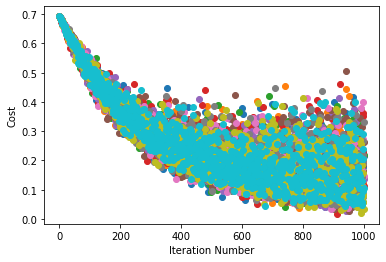

In [31]:
Engineering_Task1(data_norm)
Engineering_Task2(data_norm)
X_norm = data_norm.drop(['diagnosis','id'], axis=1).values
y_norm = data_norm['diagnosis'].values
y_norm[y_norm=='M']=0
y_norm[y_norm=='B']=1
# shuffle the indices of the data
indices = list(range(len(X_norm)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X_norm))


# split the data into training and testing sets
train_X_norm = X_norm[indices[:split_idx]]
train_y_norm = y_norm[indices[:split_idx]]
test_X_norm = X_norm[indices[split_idx:]]
test_y_norm = y_norm[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []


for i in range(10):
    model = LogisticRegression(0.001)
    # print(train_y_norm)
    itrns,costs=model.fit(train_X_norm, train_y_norm,"mini-batch")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        y_pred_norm = model.predict(test_X_norm, threshold=threshold)
        accuracy = np.mean(y_pred_norm == test_y_norm)
        recall=model.get_recall(test_X_norm,test_y_norm)
        precision=model.get_precision(test_X_norm,test_y_norm)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")       

f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')




# Learning Task2 Mini-Batch LR 0.001

Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.99
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.97
Testing precision with threshold 0.4: 0.99
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.97
Testing precision with threshold 0.5: 0.99
Testing recall with threshold 0.5: 0.98
Testing accuracy with threshold 0.5: 0.97
Testing precision with threshold 0.6: 0.99
Testing recall with threshold 0.6: 0.98
Testing accuracy with threshold 0.6: 0.97
Testing precision with threshold 0.7: 0.99
Testing recall with threshold 0.7: 0.98
Testing accuracy with threshold 0.7: 0.97
Using Stochastic Gradient Descent with Learning rate:0.0001
Testing precision with threshold 0.3: 0.99
Testing recall with threshold 0.3: 0.98
Testing accuracy with threshold 0.3: 0.98
Testing precision with threshold 0.4: 0.99
Testing recall with threshold 0.4: 0.98
Testing accuracy with threshold 0.4: 0.98
Testi

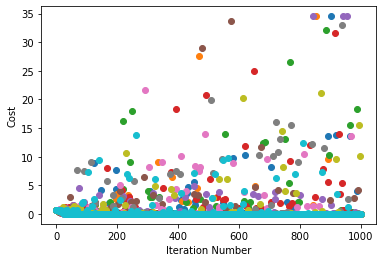

In [32]:
Engineering_Task1(data_norm)
Engineering_Task2(data_norm)
X_norm = data_norm.drop(['diagnosis','id'], axis=1).values
y_norm = data_norm['diagnosis'].values
y_norm[y_norm=='M']=0
y_norm[y_norm=='B']=1
# shuffle the indices of the data
indices = list(range(len(X_norm)))
random.shuffle(indices)

# calculate the split point
split_idx = int(0.67 * len(X_norm))


# split the data into training and testing sets
train_X_norm = X_norm[indices[:split_idx]]
train_y_norm = y_norm[indices[:split_idx]]
test_X_norm = X_norm[indices[split_idx:]]
test_y_norm = y_norm[indices[split_idx:]]

accuracies= []
precisions= []
recalls= []


for i in range(10):
    model = LogisticRegression(0.001)
    # print(train_y_norm)
    itrns,costs=model.fit(train_X_norm, train_y_norm,"stochastic")
    plt.scatter(itrns,costs)
    plt.xlabel("Iteration Number")
    plt.ylabel("Cost")
    plt.plot()
    thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
    print('Using Stochastic Gradient Descent with Learning rate:0.0001')
    for threshold in thresholds:
        y_pred_norm = model.predict(test_X_norm, threshold=threshold)
        accuracy = np.mean(y_pred_norm == test_y_norm)
        recall=model.get_recall(test_X_norm,test_y_norm)
        precision=model.get_precision(test_X_norm,test_y_norm)
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        print(f"Testing precision with threshold {threshold}: {precision:.2f}")
        print(f"Testing recall with threshold {threshold}: {recall:.2f}")
        print(f"Testing accuracy with threshold {threshold}: {accuracy:.2f}")       

f1 = (2 * np.array(precisions) * np.array(recalls)) / (np.array(precisions) + np.array(recalls))
print(f'Accuracy: {np.mean(accuracies)}; Recall: {np.mean(recalls)}; Precision: {np.mean(precisions)}; F1: {np.mean(f1)}')


